## Understanding geopandas

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:

import geopandas

import geopandas as gdp

# uses the "nybb" dataset, a map of New York boroughs, 
# which is part of the GeoPandas installation.

path_to_data = geopandas.datasets.get_path("nybb")

gdf = geopandas.read_file(path_to_data)

gdf

# imported vector files 


BoroCode       BoroName     Shape_Leng    Shape_Area  \
0         5  Staten Island  330470.010332  1.623820e+09   
1         4         Queens  896344.047763  3.045213e+09   
2         3       Brooklyn  741080.523166  1.937479e+09   
3         1      Manhattan  359299.096471  6.364715e+08   
4         2          Bronx  464392.991824  1.186925e+09   

                                            geometry  
0  MULTIPOLYGON (((970217.022 145643.332, 970227....  
1  MULTIPOLYGON (((1029606.077 156073.814, 102957...  
2  MULTIPOLYGON (((1021176.479 151374.797, 102100...  
3  MULTIPOLYGON (((981219.056 188655.316, 980940....  
4  MULTIPOLYGON (((1012821.806 229228.265, 101278...

In [3]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [4]:
gdf.geometry.values

<GeometryArray>
Length: 5, dtype: geometry

In [5]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

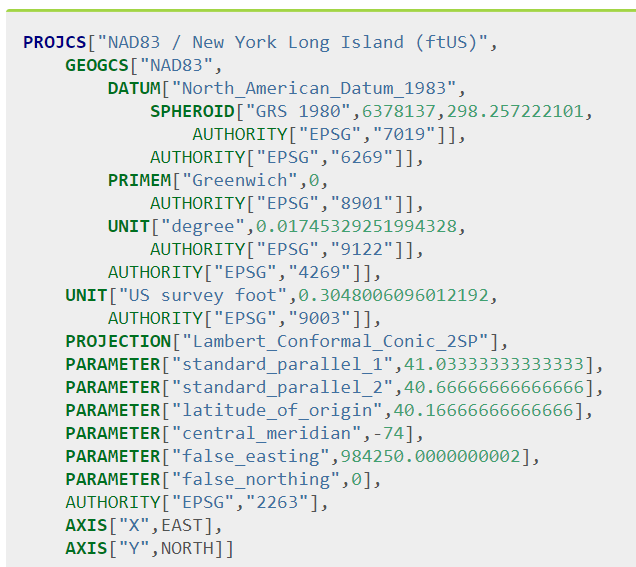

In [6]:
help(gdf.to_crs)

Help on method to_crs in module geopandas.geodataframe:

to_crs(crs=None, epsg=None, inplace=False) method of geopandas.geodataframe.GeoDataFrame instance
    Transform geometries to a new coordinate reference system.
    
    Transform all geometries in an active geometry column to a different coordinate
    reference system.  The ``crs`` attribute on the current GeoSeries must
    be set.  Either ``crs`` or ``epsg`` may be specified for output.
    
    This method will transform all points in all objects. It has no notion
    or projecting entire geometries.  All segments joining points are
    assumed to be lines in the current projection, not geodesics. Objects
    crossing the dateline (or other projection boundary) will have
    undesirable behavior.
    
    Parameters
    ----------
    crs : pyproj.CRS, optional if `epsg` is specified
        The value can be anything accepted by
        :meth:`pyproj.CRS.from_user_input() <pyproj.crs.CRS.from_user_input>`,
        such as an

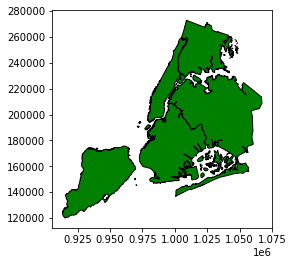

In [7]:
gdf.plot(color='green', edgecolor ='black');

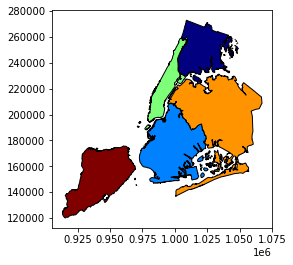

In [8]:
gdf.plot(cmap='jet', edgecolor ='black', column = 'BoroName');

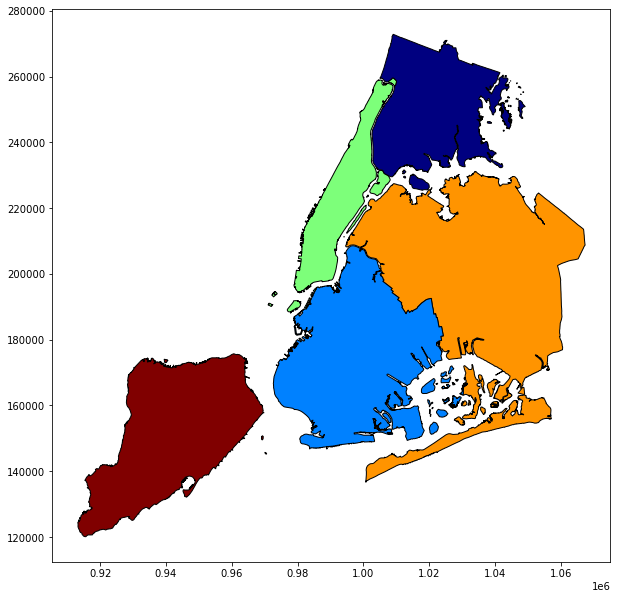

In [9]:
gdf.plot(cmap='jet', 
         edgecolor ='black', 
         column = 'BoroName',
         figsize=(10,100));

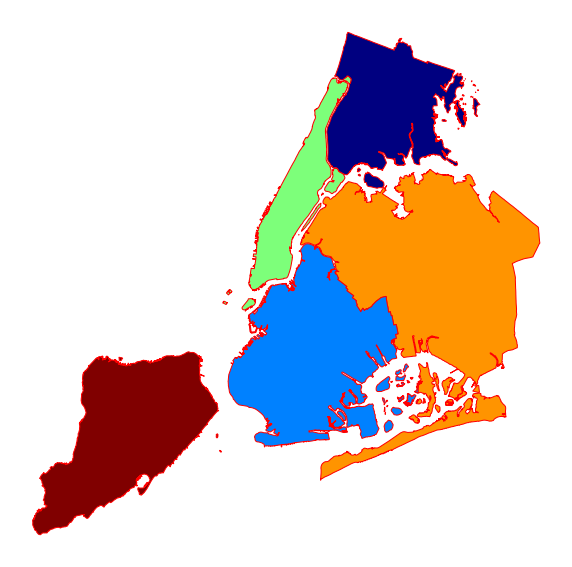

In [10]:
ax = gdf.plot(cmap='jet', 
         edgecolor ='red', 
         column = 'BoroName',
         figsize=(10,100));

ax.axis('off'); 

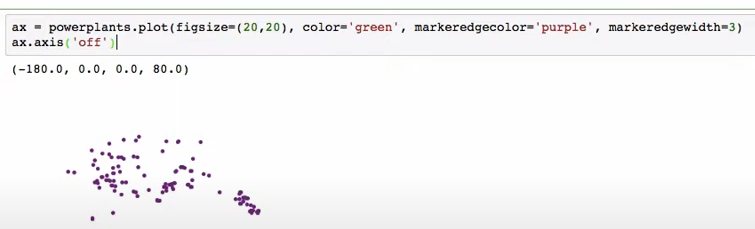

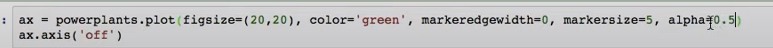

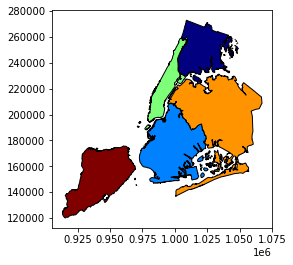

In [11]:
gdf.plot(cmap='jet', edgecolor ='black', column = 'BoroName');

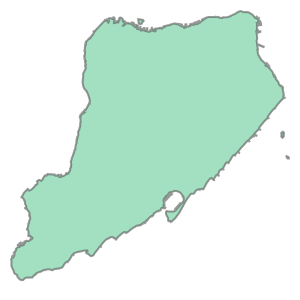

In [12]:
gdf.geometry[0]  # lower left 

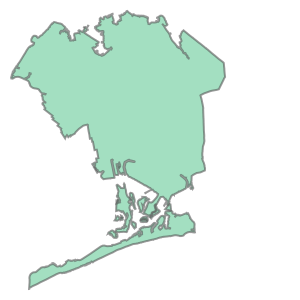

In [13]:
gdf.geometry[1]

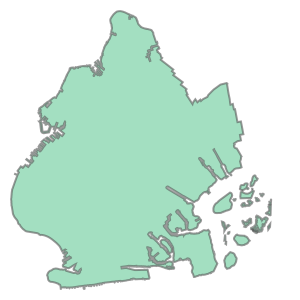

In [14]:
gdf.geometry[2]

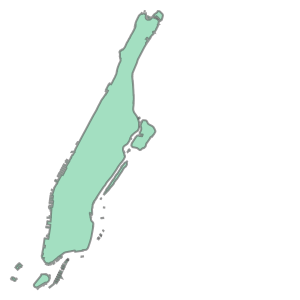

In [15]:
gdf.geometry[3]

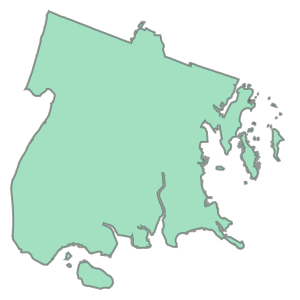

In [16]:
gdf.geometry[4]

In [17]:
# gdf.to_file("my_file.geojson", driver="GeoJSON")

In [18]:
gdf = gdf.set_index("BoroName")

In [19]:
gdf

BoroCode     Shape_Leng    Shape_Area  \
BoroName                                               
Staten Island         5  330470.010332  1.623820e+09   
Queens                4  896344.047763  3.045213e+09   
Brooklyn              3  741080.523166  1.937479e+09   
Manhattan             1  359299.096471  6.364715e+08   
Bronx                 2  464392.991824  1.186925e+09   

                                                        geometry  
BoroName                                                          
Staten Island  MULTIPOLYGON (((970217.022 145643.332, 970227....  
Queens         MULTIPOLYGON (((1029606.077 156073.814, 102957...  
Brooklyn       MULTIPOLYGON (((1021176.479 151374.797, 102100...  
Manhattan      MULTIPOLYGON (((981219.056 188655.316, 980940....  
Bronx          MULTIPOLYGON (((1012821.806 229228.265, 101278...

In [20]:
gdf["area"] = gdf.area
gdf["area"]

BoroName
Staten Island    1.623822e+09
Queens           3.045214e+09
Brooklyn         1.937478e+09
Manhattan        6.364712e+08
Bronx            1.186926e+09
Name: area, dtype: float64

In [21]:
gdf['boundary'] = gdf.boundary
gdf['boundary']

BoroName
Staten Island    MULTILINESTRING ((970217.022 145643.332, 97022...
Queens           MULTILINESTRING ((1029606.077 156073.814, 1029...
Brooklyn         MULTILINESTRING ((1021176.479 151374.797, 1021...
Manhattan        MULTILINESTRING ((981219.056 188655.316, 98094...
Bronx            MULTILINESTRING ((1012821.806 229228.265, 1012...
Name: boundary, dtype: geometry

In [22]:
gdf['centroid'] = gdf.centroid
gdf['centroid']

BoroName
Staten Island     POINT (941639.450 150931.991)
Queens           POINT (1034578.078 197116.604)
Brooklyn          POINT (998769.115 174169.761)
Manhattan         POINT (993336.965 222451.437)
Bronx            POINT (1021174.790 249937.980)
Name: centroid, dtype: geometry

In [23]:
first_point = gdf['centroid'].iloc[0]
gdf['distance'] = gdf['centroid'].distance(first_point)
gdf['distance']

BoroName
Staten Island         0.000000
Queens           103781.535276
Brooklyn          61674.893421
Manhattan         88247.742789
Bronx            126996.283623
Name: distance, dtype: float64

In [24]:
gdf['distance'].mean()

76140.09102166798

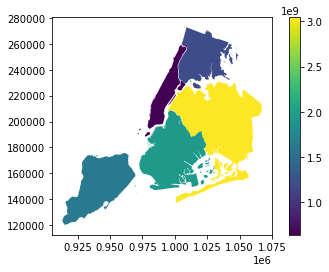

In [25]:
gdf.plot("area", legend=True);

In [26]:
gdf.explore("area", legend=False)

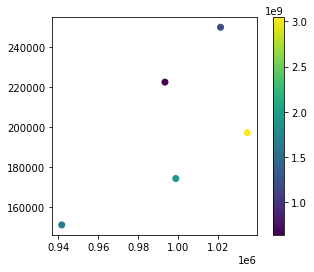

In [27]:
gdf = gdf.set_geometry("centroid")
gdf.plot("area", legend=True); 

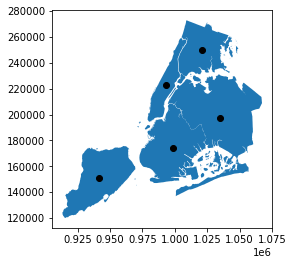

In [28]:
ax = gdf["geometry"].plot()
gdf["centroid"].plot(ax=ax, color="black"); 

In [29]:
gdf = gdf.set_geometry("geometry")

In [30]:
# ex:  countries_gdf.to_file("countries.shp")
# ex:  countries_gdf.to_file("countries.geojson", driver='GeoJSON')

In [31]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [32]:
gdf.geometry

BoroName
Staten Island    MULTIPOLYGON (((970217.022 145643.332, 970227....
Queens           MULTIPOLYGON (((1029606.077 156073.814, 102957...
Brooklyn         MULTIPOLYGON (((1021176.479 151374.797, 102100...
Manhattan        MULTIPOLYGON (((981219.056 188655.316, 980940....
Bronx            MULTIPOLYGON (((1012821.806 229228.265, 101278...
Name: geometry, dtype: geometry

In [33]:
type(gdf.geometry)

geopandas.geoseries.GeoSeries

In [34]:
gdf.geometry.area

BoroName
Staten Island    1.623822e+09
Queens           3.045214e+09
Brooklyn         1.937478e+09
Manhattan        6.364712e+08
Bronx            1.186926e+09
dtype: float64

In [35]:
gdf.geometry.name

'geometry'

In [36]:
gdf.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

---

---

In [37]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [38]:
df = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

In [39]:
gdf = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.Longitude, df.Latitude))

In [40]:
print(gdf.head())

           City    Country  Latitude  Longitude                     geometry
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66000 -34.58000)
1      Brasilia     Brazil    -15.78     -47.91  POINT (-47.91000 -15.78000)
2      Santiago      Chile    -33.45     -70.66  POINT (-70.66000 -33.45000)
3        Bogota   Colombia      4.60     -74.08    POINT (-74.08000 4.60000)
4       Caracas  Venezuela     10.48     -66.86   POINT (-66.86000 10.48000)


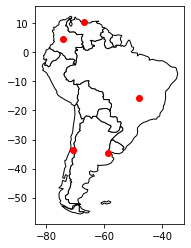

In [41]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

---

---

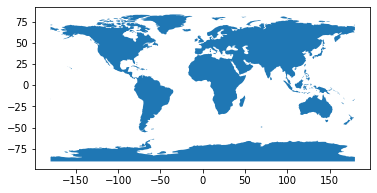

In [42]:
url = "http://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_land.geojson"
df2 = geopandas.read_file(url)
df2.plot(); 

---

---

In [43]:
url = "http://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_land.geojson"
dfg = geopandas.read_file(url)


In [44]:
dfg.head(10)

scalerank featureclass                                           geometry
0          1      Country  POLYGON ((-59.57209 -80.04018, -59.86585 -80.5...
1          1      Country  POLYGON ((-159.20818 -79.49706, -161.12760 -79...
2          1      Country  POLYGON ((-45.15476 -78.04707, -43.92083 -78.4...
3          1      Country  POLYGON ((-121.21151 -73.50099, -119.91885 -73...
4          1      Country  POLYGON ((-125.55957 -73.48135, -124.03188 -73...
5          1      Country  POLYGON ((-98.98155 -71.93333, -97.88474 -72.0...
6          1      Country  POLYGON ((-68.45135 -70.95582, -68.33383 -71.4...
7          1      Country  POLYGON ((-58.61414 -64.15247, -59.04507 -64.3...
8          1      Country  POLYGON ((-67.75000 -53.85000, -66.45000 -54.4...
9          1      Country  POLYGON ((-58.55000 -51.10000, -57.75000 -51.5...

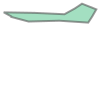

In [45]:
dfg.geometry[0]

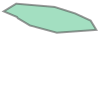

In [46]:
dfg.geometry[1]

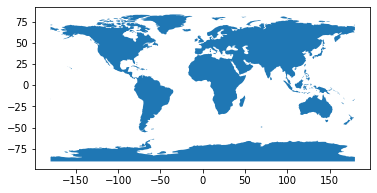

In [47]:
dfg.plot(); 

---

---

In [48]:

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))


In [49]:
world.head()

pop_est      continent                      name iso_a3  gdp_md_est  \
0     920938        Oceania                      Fiji    FJI      8374.0   
1   53950935         Africa                  Tanzania    TZA    150600.0   
2     603253         Africa                 W. Sahara    ESH       906.5   
3   35623680  North America                    Canada    CAN   1674000.0   
4  326625791  North America  United States of America    USA  18560000.0   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

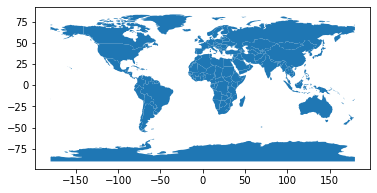

In [50]:
world.plot();

C:\Users\tbresee\Anaconda3\lib\site-packages\geopandas\geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


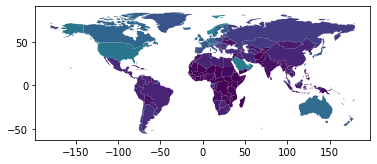

In [51]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

world['gdp_per_cap'] = world.gdp_md_est / world.pop_est

world.plot(column='gdp_per_cap');

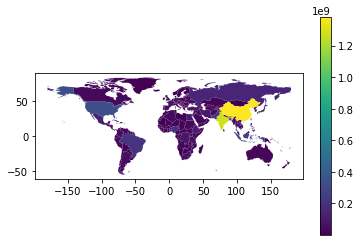

In [52]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1)

world.plot(column='pop_est', ax=ax, legend=True); 


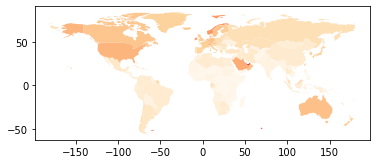

In [53]:
world.plot(column='gdp_per_cap', cmap='OrRd');

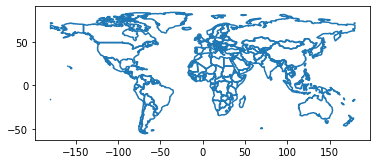

In [54]:
world.boundary.plot();

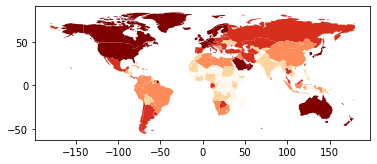

In [55]:
world.plot(column='gdp_per_cap', cmap='OrRd', scheme='quantiles');

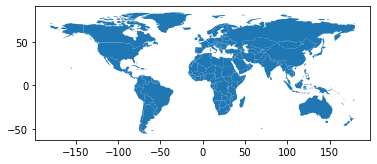

In [56]:
ax = world.plot()

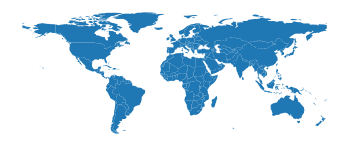

In [57]:
ax = world.plot()

ax.set_axis_off();

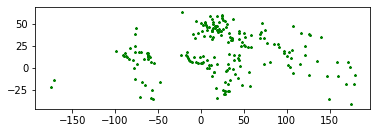

In [58]:
cities.plot(marker='*', color='green', markersize=5);


cities = cities.to_crs(world.crs)

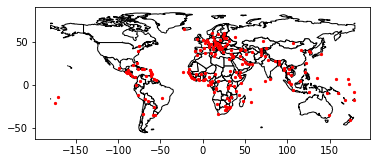

In [59]:
base = world.plot(color='white', edgecolor='black')

cities.plot(ax=base, marker='o', color='red', markersize=5);

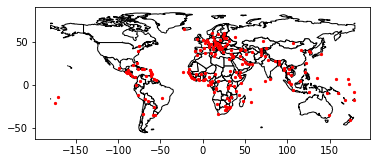

In [60]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()




ax.set_aspect('equal')

world.plot(ax=ax, color='white', edgecolor='black')


cities.plot(ax=ax, marker='o', color='red', markersize=5)


plt.show();

---

---

In [61]:
from shapely.geometry import Point

In [62]:
%matplotlib inline

In [63]:
list(dir(gdf))

['City',
 'Country',
 'Latitude',
 'Longitude',
 'T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',


In [64]:
help(geopandas)

Help on package geopandas:

NAME
    geopandas

PACKAGE CONTENTS
    _compat
    _config
    _decorator
    _vectorized
    _version
    array
    base
    conftest
    datasets (package)
    explore
    geodataframe
    geoseries
    io (package)
    plotting
    sindex
    testing
    tests (package)
    tools (package)

DATA
    options = Options(
      display_precision: None [default: Non...USE_PYGEO...

VERSION
    0.10.2

FILE
    c:\users\tbresee\anaconda3\lib\site-packages\geopandas\__init__.py




---

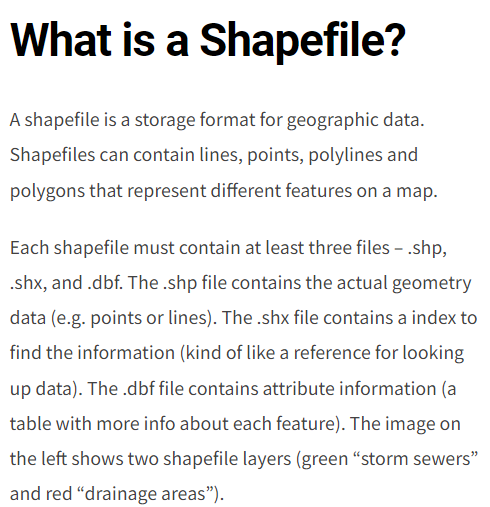

In [65]:
# states = gdp.read_file('some.shp')

In [66]:
z = gdp.read_file(r'D:\mexico\cities.shp')  # only because it needed all the other files

In [67]:
z

NAME CAPITAL             STATE_NAME  POPULATION  \
0            Monterrey       Y             Nuevo Leon     2015000   
1             Mazatlan       N                Sinaloa      199830   
2          Guadalajara       Y                Jalisco     2325000   
3              Tampico       N             Tamaulipas      435000   
4          Mexico City       C       Distrito Federal    14100000   
5   Puebla de Zaragoza       Y                 Puebla     1055000   
6             Veracruz       N         Veracruz-Llave      385000   
7               Oaxaca       Y                 Oaxaca      154223   
8               Merida       Y                Yucatan      400142   
9             Mexicali       Y  Baja California Norte      365000   
10      Aguascalientes       Y         Aguascalientes      293152   
11            Campeche       Y               Campeche      128434   
12              La Paz       Y    Baja California Sur       91453   
13    Tuxtla Gutierrez       Y                Chiapas      131096   
14           Chihuahua       Y              Chihuahua      385603   
15            Saltillo       Y   Coahuila De Zaragoza      284937   
16              Colima       Y                 Colima       86044   
17             Durango       Y                Durango      257915   
18          Guanajuato       Y             Guanajuato       48981   
19        Chilpancingo       Y               Guerrero       67498   
20             Pachuca       Y                Hidalgo      110351   
21             Morelia       Y    Michoacan de Ocampo      297544   
22              Toluca       Y                 Mexico      199778   
23          Cuernavaca       Y                Morelos      192770   
24               Tepic       Y                Nayarit      145741   
25           Queretaro       Y   Queretaro de Arteaga      215976   
26            Chetumal       Y           Quintana Roo       56709   
27     San Luis Potosi       Y        San Luis Potosi      470000   
28            Culiacan       Y                Sinaloa      304826   
29          Hermosillo       Y                 Sonora      297175   
30        Villahermosa       Y                Tabasco      158216   
31            Tlaxcala       Y               Tlaxcala       35384   
32              Jalapa       Y         Veracruz-Llave      204594   
33           Zacatecas       Y              Zacatecas       80088   
34     Ciudad Victoria       Y             Tamaulipas      140161   
35            Acapulco       N               Guerrero      301902   

                       geometry  
0   POINT (-100.31709 25.67735)  
1   POINT (-106.41607 23.20383)  
2   POINT (-103.34380 20.67359)  
3    POINT (-97.84263 22.24323)  
4    POINT (-99.12757 19.42705)  
5    POINT (-98.19295 19.04863)  
6    POINT (-96.08524 19.00683)  
7    POINT (-96.95135 16.90743)  
8    POINT (-89.55286 20.82187)  
9   POINT (-115.29424 32.62020)  
10  POINT (-102.18634 21.85335)  
11   POINT (-90.54466 19.80399)  
12  POINT (-110.25386 24.18983)  
13   POINT (-92.99516 16.63030)  
14  POINT (-105.97516 28.56030)  
15  POINT (-100.99583 25.44186)  
16  POINT (-103.68410 19.21037)  
17  POINT (-104.40000 24.02000)  
18  POINT (-101.15000 21.01000)  
19   POINT (-99.38337 17.35706)  
20   POINT (-98.70045 20.09706)  
21  POINT (-101.07320 19.66335)  
22   POINT (-99.53128 19.32050)  
23   POINT (-99.18118 18.95008)  
24  POINT (-104.78242 21.53045)  
25  POINT (-100.24117 20.50074)  
26   POINT (-88.26436 18.55124)  
27  POINT (-100.96924 22.13672)  
28  POINT (-107.45556 24.71334)  
29  POINT (-110.83422 29.02044)  
30   POINT (-92.86255 17.96756)  
31   POINT (-98.19723 19.27763)  
32   POINT (-96.92548 19.46773)  
33  POINT (-102.72294 22.75922)  
34   POINT (-99.14811 23.73515)  
35   POINT (-99.93150 16.97439)

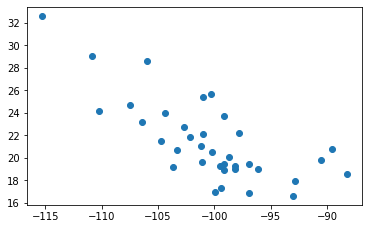

In [68]:
z.plot(); 

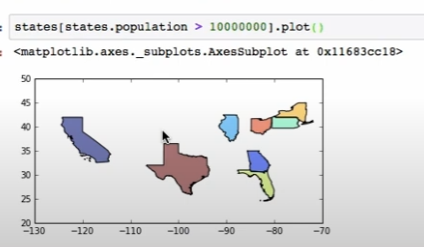